In [78]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [79]:
from glob import glob
import os, math, time
import sys


import numpy as np
import astropy
from astropy import units as u, constants as const
from astropy.time import Time
from astropy.visualization import quantity_support

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib as mpl

#path to psr_tools github dir:
sys.path.insert(1, '/home/gusinskaia/psr_tools')
import load_data as ld
import ds_psr as dsa
import fit_thth as fth
import models_thth as mth
import wsrt_fits as wf
import gbt_fits as gf
import ththmod as THTH

In [69]:
#path to where your npz files with dynamic specra are:
gbt_dir='/mnt/scratch-lustre/gusinskaia/triple_system/2021_GBT_dss/'
names=sorted(glob(gbt_dir+'*'))


actual_names=[x.split('/')[-1] for x in names]
mjds=[x.split('_')[0] for x in actual_names]
path_name=names[0].split(actual_names[0])[0]

print (mjds)
print (path_name)

['59297', '59299', '59324', '59363', '59399', '59403', '59426', '59434', '59464', '59496', '59498', '59518', '59545', '59574', '59646', '59647', '59673', '59699', '59722', '59732', '59747', '59747', '59770', '59797', '59827', '59855', '59886', '59915', '59919', '59919', '59919', '59943', '60055', '60341', '60349', '60367', '60397', '60401', '60423', '60449', '60454', '60454', '60454', '60454', '60454', '60554', '60555', '60614', '60646', '60648', '60705', '60757', '60770']
/mnt/scratch-lustre/gusinskaia/triple_system/2021_GBT_dss/


# Load data

In [70]:
spec_59574=gf.load_new_gbt(59574)
spec_59574

(2452, 2048)


<Dynamic spectrum: Dur: 6.99 hr, Freq: 1149.83 - 1850 MHz, MJD: 59575.09, PSR: PSRJ0337+1715, Tel: GBT, w noise>

In [71]:
spec_59574?

Type:           Spec
String form:    <Dynamic spectrum: Dur: 6.99 hr, Freq: 1149.83 - 1850 MHz, MJD: 59575.09, PSR: PSRJ0337+1715, Tel: GBT, w noise>
File:           ~/psr_tools/ds_psr.py
Docstring:      Spectrum object
Init docstring:
class to manipulate dynamic spectra
Usually initiated from npz file using function load_triple_spectra,
but it can aslo be cropped from other Spec object
or constracted manualy. While initiated it automatically creates secondary spectra, thus requiring decision about padding.

I - dynamic spectra (2D float array)
t, f - time and frequency axes (astropy.units quantities)
stend - start and end of the observation in mjd (astropy.Time object)
nI - array of noise in dynamic spectra

tel - Observatory with which the data was obtained (if known)
psr - pulsar name of the object (if known)
pad_it  - whether to pad the secondary spectra with zeros
npad - (int) number of paded zeros 
ns_info - whether noise data is present or not

In [72]:
spec_59574.ss?

Type:        SecSpec
String form: <Secondary spectrum>
File:        ~/psr_tools/ds_psr.py
Docstring:  
Seconday spectum object
Is - 2d fourier transform of dynamic spectrum (I or ds); type: 2D complex numpy array
tau - doppler delay (fourier tranform axis in frequency domain); type: 1D astropy quantity (mus)
fd - frindge frequency (fourier transform axis in time domain); type: 1D astropy quentity (mHz)

In [73]:
spec_59574.acf?

Type:        Acf
String form: <ACF>
File:        ~/psr_tools/ds_psr.py
Docstring:  
Autocorrelation of the dynamic spectrum and its axes
acf - autocorrelation function itself (2D complex np array)
lt - time lag; (acf axis in time domain); type: 1D astropy quantity (min)
lf - frequency lag (acf axis in frequency domain); type: 1D astropy quantity (MHz)

# Plot data

#### Plot dynamic and secondary spectra

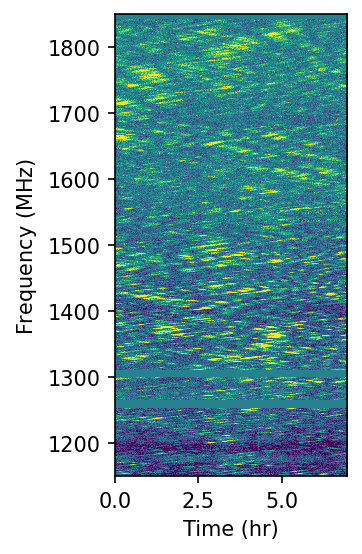

In [13]:
spec_59574.plot_ds(figsize=(2,4))

#### Plot secondary spectra

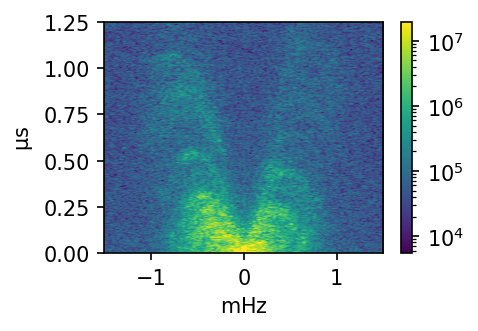

In [14]:
spec_59574.plot_ss(tau_lim=[0,1.25])

#### Plot Acf

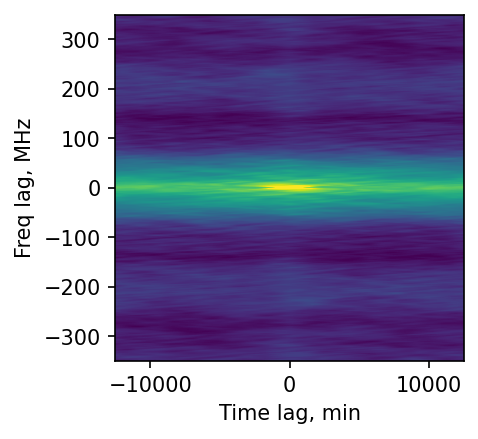

In [32]:
spec_59574.plot_acf()

# Cut data:

#### cut in frequency:

In [42]:
spec_sel_f=spec_59574.select(freq_sel=[1322*u.MHz,1450*u.MHz])

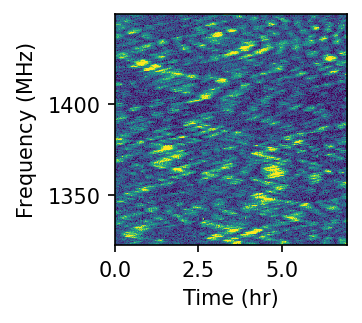

In [43]:
spec_sel_f.plot_ds(figsize=(2,2))

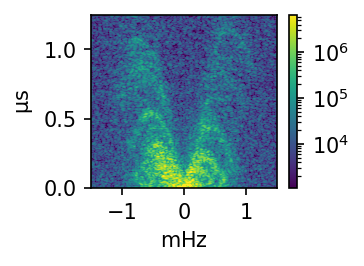

In [44]:
spec_sel_f.plot_ss(figsize=(2,1.5),tau_lim=[0,1.25])

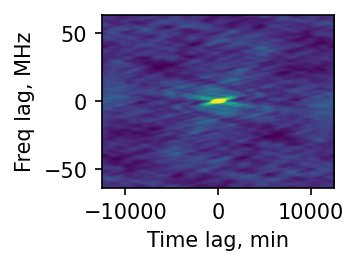

In [45]:
spec_sel_f.plot_acf(figsize=(2,1.5))

#### cut in time

In [54]:
mjd_dur=1/24# 1 hour
spec_sel_t=spec_59574.select(time_sel=[(spec_59574.stend[0])*u.d,(spec_59574.stend[0]+mjd_dur)*u.d])

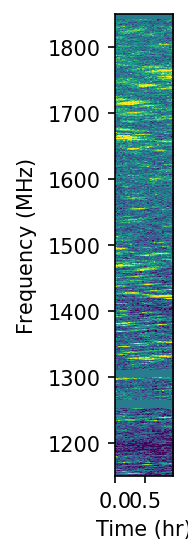

In [56]:
spec_sel_t.plot_ds(figsize=(0.5,4))

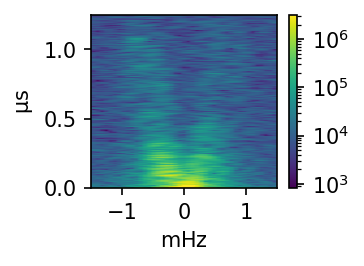

In [57]:
spec_sel_t.plot_ss(figsize=(2,1.5),tau_lim=[0,1.25])

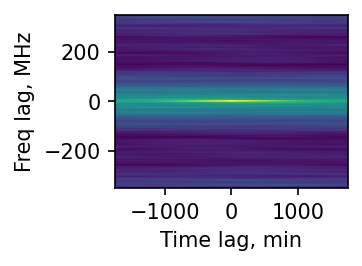

In [58]:
spec_sel_t.plot_acf(figsize=(2,1.5))

### Of course can do both time and frequency in one go:

In [59]:
mjd_dur=1/24# 1 hour
spec_sel=spec_59574.select(freq_sel=[1322*u.MHz,1450*u.MHz],
                           time_sel=[(spec_59574.stend[0])*u.d,(spec_59574.stend[0]+mjd_dur)*u.d])

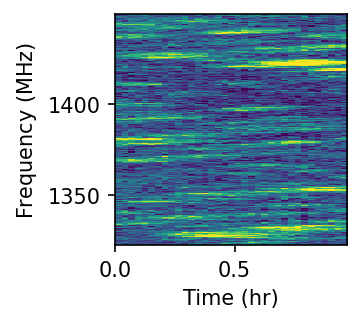

In [61]:
spec_sel.plot_ds(figsize=(2,2))

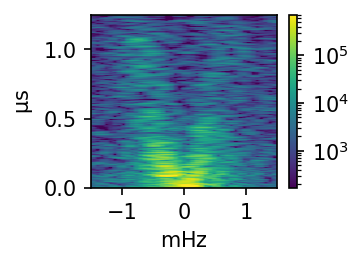

In [63]:
spec_sel.plot_ss(figsize=(2,1.5),tau_lim=[0,1.25])

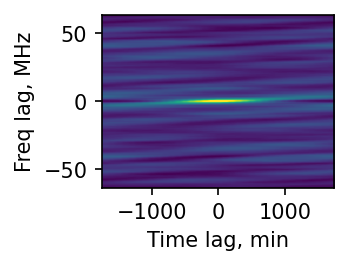

In [64]:
spec_sel.plot_acf(figsize=(2,1.5))